In [1]:
import pandas as pd

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel('final_data.xlsx')

# Create a dictionary for the 'Batting_team' column
batting_team_dict = {team: idx for idx, team in enumerate(df['Batting_team'].unique())}

# Create a dictionary for the 'Bowling_team' column
bowling_team_dict = {team: idx for idx, team in enumerate(df['Bowling_team'].unique())}

# Create a dictionary for the 'city' column
city_dict = {city: idx for idx, city in enumerate(df['city'].unique())}

# Printing the dictionaries
print("Dictionary for 'Batting_team':")
print(batting_team_dict)
print("\nDictionary for 'Bowling_team':")
print(bowling_team_dict)
print("\nDictionary for 'city':")
print(city_dict)


Dictionary for 'Batting_team':
{'Royal Challengers Bangalore': 0, 'Rising Pune Supergiant': 1, 'Kolkata Knight Riders': 2, 'Kings XI Punjab': 3, 'Delhi Daredevils': 4, 'Sunrisers Hyderabad': 5, 'Mumbai Indians': 6, 'Gujarat Lions': 7, 'Chennai Super Kings': 8, 'Rajasthan Royals': 9, 'Delhi Capitals': 10, 'Deccan Chargers': 11}

Dictionary for 'Bowling_team':
{'Sunrisers Hyderabad': 0, 'Mumbai Indians': 1, 'Gujarat Lions': 2, 'Rising Pune Supergiant': 3, 'Royal Challengers Bangalore': 4, 'Kolkata Knight Riders': 5, 'Delhi Daredevils': 6, 'Kings XI Punjab': 7, 'Rajasthan Royals': 8, 'Chennai Super Kings': 9, 'Delhi Capitals': 10, 'Deccan Chargers': 11}

Dictionary for 'city':
{'Hyderabad': 0, 'Pune': 1, 'Rajkot': 2, 'Indore': 3, 'Bengaluru': 4, 'Mumbai': 5, 'Kolkata': 6, 'Bangalore': 7, 'Delhi': 8, 'Chandigarh': 9, 'Kanpur': 10, 'Chennai': 11, 'Jaipur': 12, 'Visakhapatnam': 13, 'Abu Dhabi': 14, 'Dubai': 15, 'UAE': 16, 'Ahmedabad': 17, 'Sharjah': 18, 'Navi Mumbai': 19, 'Guwahati': 20, 'Ca

In [2]:
import pandas as pd

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel('final_data.xlsx')  # Replace 'your_excel_file.xlsx' with the path to your Excel file

# Create dictionaries for the 'Batting_team', 'Bowling_team', and 'city' columns
batting_team_dict = {team: idx for idx, team in enumerate(df['Batting_team'].unique())}
bowling_team_dict = {team: idx for idx, team in enumerate(df['Bowling_team'].unique())}
city_dict = {city: idx for idx, city in enumerate(df['city'].unique())}

# Update the DataFrame with new values from the dictionaries
df['Batting_team'] = df['Batting_team'].map(batting_team_dict)
df['Bowling_team'] = df['Bowling_team'].map(bowling_team_dict)
df['city'] = df['city'].map(city_dict)

# Save the modified DataFrame to a new Excel file
output_file = 'modified_excel_file.xlsx'  # Define the path for the new Excel file
df.to_excel(output_file, index=False)

print(f"DataFrame with updated values saved to {output_file}")


DataFrame with updated values saved to modified_excel_file.xlsx


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Validation Accuracy: 0.8918146560522555
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7104
           1       0.88      0.91      0.90      7593

    accuracy                           0.89     14697
   macro avg       0.89      0.89      0.89     14697
weighted avg       0.89      0.89      0.89     14697

Validation Confusion Matrix:
[[6197  907]
 [ 683 6910]]


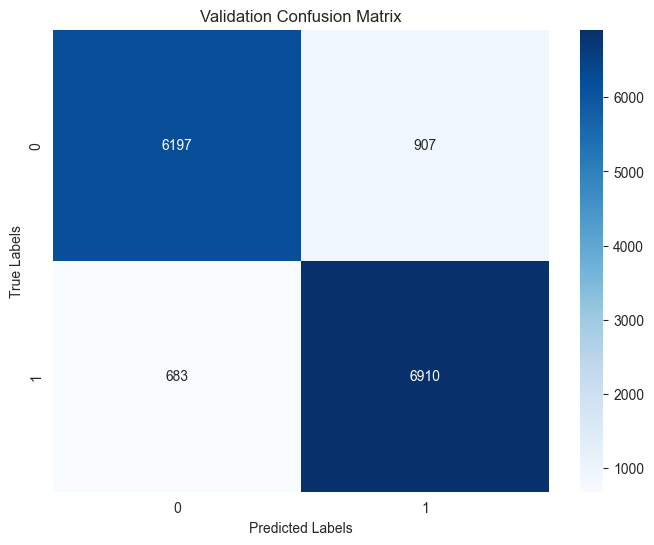

Test Accuracy: 0.890121104912233
Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6962
           1       0.89      0.91      0.90      7736

    accuracy                           0.89     14698
   macro avg       0.89      0.89      0.89     14698
weighted avg       0.89      0.89      0.89     14698

Test Confusion Matrix:
[[6073  889]
 [ 726 7010]]


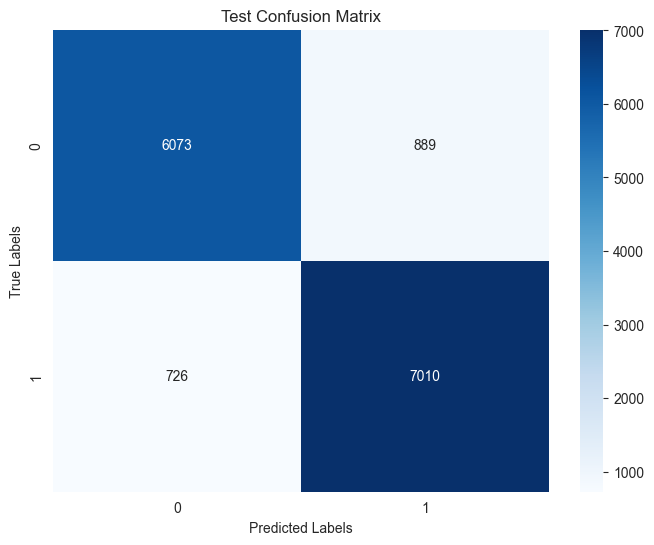

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
final_df = pd.read_excel("modified_excel_file.xlsx")

# Extract features and target
X = final_df.drop(['result'], axis=1)
y = final_df['result']

# Replace inf and negative values in 'cur_run_rate' with zeros
X['cur_run_rate'] = X['cur_run_rate'].apply(lambda x: 0 if x <= 0 or np.isinf(x) else x)

# # Encode categorical variables
# label_encoders = {}
# categorical_columns = ['Batting_team', 'Bowling_team', 'city']
# 
# for col in categorical_columns:
#     label_encoders[col] = LabelEncoder()
#     X[col] = label_encoders[col].fit_transform(X[col])

# Split the data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=45)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=45)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [2]
}

# Create and train the RandomForestClassifier with GridSearchCV
clf = RandomForestClassifier(random_state=45)
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the validation set using the best model
best_clf = grid_search.best_estimator_
validate_pred = best_clf.predict(X_validate)

# Calculate and print the validation accuracy
accuracy_validate = accuracy_score(y_validate, validate_pred)
print("Validation Accuracy:", accuracy_validate)

# Print a classification report for more detailed performance metrics
print("Validation Classification Report:")
print(classification_report(y_validate, validate_pred))

# Get the confusion matrix for the validation set
confusion_matrix_validate = confusion_matrix(y_validate, validate_pred)
print("Validation Confusion Matrix:")
print(confusion_matrix_validate)

# Plot the confusion matrix as a chart
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_validate, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Validation Confusion Matrix')
plt.show()

# Make predictions on the test set using the best model
test_pred = best_clf.predict(X_test)

# Calculate and print the test accuracy
accuracy_test = accuracy_score(y_test, test_pred)
print("Test Accuracy:", accuracy_test)

# Print a classification report for more detailed performance metrics
print("Test Classification Report:")
print(classification_report(y_test, test_pred))

# Get the confusion matrix for the test set
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print("Test Confusion Matrix:")
print(confusion_matrix_test)

# Plot the confusion matrix as a chart for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Confusion Matrix')
plt.show()


In [5]:
import pickle

# Save the trained model to a file
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_clf, model_file)

# Now you have the model saved to 'random_forest_model.pkl'
